In [2]:
import joblib

load_model = joblib.load('model.pk1')
load_model

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [4]:
import glob
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd

key_path = glob.glob('jnu-team-03-2-85b8ae74d8b7.json')[0]

# BigQuery 클라이언트 초기화


credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials=credentials, project = credentials.project_id)
# 쿼리 작성
query = """
select * from `jnu-team-03-2.kipl_bigquery_database.food`
"""
df = client.query(query).to_dataframe()
df

,food_name,ingredient_name,ingredient_gram,calorie,carbohydrate,protein,fat
0,감자 미음,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 감자, 생것]","[-1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1.0, 10.0]",40.299999,8.800,0.900,0.0000
1,밥 새우 애호박 새송이 버섯 양파 죽,"[쌀, 애호박, 새송이버섯, 양파]","[5.0, 3.0, 3.0, 3.0]",107.000000,21.450,2.980,0.0000
2,양송이 버섯 감자 수프,"[양송이, 생것, 감자, 생것, 고구마, 생것, 분유, 조제분유]","[-1.0, 20.0, -1.0, 10.0, -1.0, 10.0, -1.0, 10.0]",68.800003,10.000,3.100,2.0000
3,닭고기 청경채 당근 죽,"[쌀, 닭고기, 청경채, 당근]","[10.0, 5.0, 5.0, 5.0]",143.600000,8.825,6.125,2.0000
4,닭고기 양파 시금치 죽,"[쌀, 닭고기, 양파, 시금치]","[10.0, 5.0, 5.0, 5.0]",144.350000,9.970,6.450,2.0000
...,...,...,...,...,...,...,...
231,소고기 가지 들깨,"[쌀, 소고기, 가지, 들깨가루]","[8.0, 6.0, 3.0, 1.6]",83.900000,7.750,5.850,3.2350
232,김 당근 양파,"[쌀, 잔멸치, 김, 당근, 양파]","[10.0, 3.0, 2.5, 4.5, 5.0]",67.500000,11.795,3.145,0.4050
233,건포도 양배추 치즈,"[쌀, 양배추, 건포도, 아기치즈]","[7.5, 3.0, 2.5, 1.5]",46.900000,8.315,0.910,0.1325
234,소고기 아스파라거스 케일 죽,"[쌀, 소고기, 아스파라거스, 케일]","[5.0, 3.0, 1.5, 1.5]",32.500000,4.850,1.625,0.1950


In [5]:
# 빈 데이터프레임 생성
new_df = pd.DataFrame()

# 원본 데이터프레임 순회
for index, row in df.iterrows():
    food_name = row['food_name']
    ingredient_names = row['ingredient_name']
    ingredient_grams = row['ingredient_gram']
    
    # 재료 이름과 그램을 딕셔너리 형태로 매핑
    ingredient_dict = dict(zip(ingredient_names, ingredient_grams))
    
    # 새로운 행 추가
    new_row = {'food_name': food_name, **ingredient_dict}
    new_df = new_df.append(new_row, ignore_index=True)

new_data = pd.DataFrame(new_df)

/var/tmp/ipykernel_2159210/2132924421.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_2159210/2132924421.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_2159210/2132924421.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_2159210/2132924421.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_2159210/2132924421.py:15: FutureWarning: The frame.append

In [6]:
data = new_data.copy()
data = data.iloc[:,1:]
data = data.fillna(0)
k = 5
data = data.replace(-1.0,k)

training_feature = ['쌀', '찹쌀', '백미', '멥쌀', '논벼', '백미 국내산', '일반형', '일품', '닭고기', '가슴살', '날것', '고구마', '생것', '당근', '청경채 중국채소', '컬리플라워', '멜론', '머스크', '감자', '호박', '애호박', '완두콩', '바나나', '생과', '요구르트', '호상', '브로콜리', '표고버섯', '양파', '국내산', '콩나물', '두부', '대두', '검정콩', '흑태', '연두부', '파', '대파', '기장', '도정곡', '당호박', '양배추', '오이', '재래종', '사과', '부사', '대구', '전분', '감자녹말', '배추', '얼갈이', '송이버섯', '쇠고기', '한우', '사태', '옥수수', '찰옥수수', '가지', '파프리카', '참깨', '흰깨', '볶은것', '무', '조선무', '뿌리', '오렌지', '흑미', '배', '신고', '수박', '적육질', '수수', '현미', '명태', '호두', '말린것', '밤', '들깨', '미역', '분유', '조제분유', '양송이', '우엉', '비츠', '치즈', '가공치즈', '아욱', '계란', '난황', '조기', '파래', '시금치', '노지', '육수', '다시마', '우유', '가공우유', '보통', '레몬', '과즙', '숙주나물', '연근', '콩기름', '전란', '소면', '마른것', '쌀가루', '밀가공식품', '밀가루', '중력분', '카레분말', '돔', '감성돔']
data_reorder = data[training_feature]
predict_data = data_reorder

In [7]:
prediction = load_model.predict(predict_data)
label = prediction
label_df = pd.DataFrame(label,columns=['category'])

In [8]:
result = pd.concat([label_df,new_data['food_name'],data_reorder],axis=1)
result

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,초기 이유식,감자 미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,후기 이유식,밥 새우 애호박 새송이 버섯 양파 죽,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,후기 이유식,양송이 버섯 감자 수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,후기 이유식,닭고기 청경채 당근 죽,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,후기 이유식,닭고기 양파 시금치 죽,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,이유기 간식,소고기 가지 들깨,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,후기 이유식,김 당근 양파,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,이유기 간식,건포도 양배추 치즈,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,이유기 간식,소고기 아스파라거스 케일 죽,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.cluster import KMeans # KMeans 라이브러리 불러오기
import numpy as np
import pandas as pd
import math
import seaborn as sb # 데이터 시각화를 위한 seaborn
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib
import scipy as sp
from scipy.spatial import distance
sb.set_palette("Set2")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

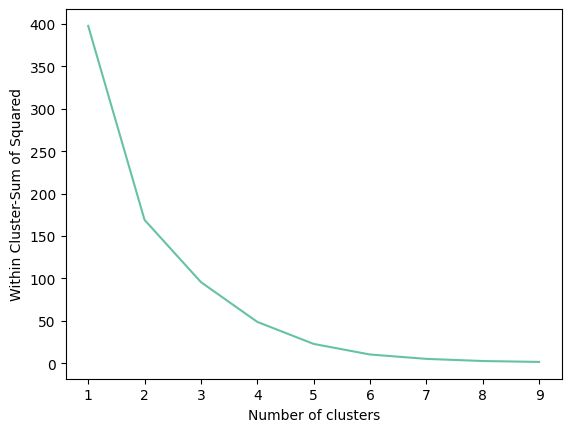

4
6
8


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
early = result[result['category'] == '초기 이유식']
early_data = pd.merge(early, df, on='food_name', how='inner')
nutrient =  ['carbohydrate', 'protein', 'fat','calorie']
early_train_data = early_data.copy()
early_train_data = early_train_data[nutrient]

# Elbow method 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(early_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

# KMeans 군집화 모델 생성
num_clusters = 3  # 군집 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(early_train_data)

# 군집 결과를 데이터프레임에 추가
early_data['cluster'] = kmeans.labels_ 

k0 = (early_data['cluster'] == 0).sum();print(k0)
k1 = (early_data['cluster'] == 1).sum();print(k1)
k2 = (early_data['cluster'] == 2).sum();print(k2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

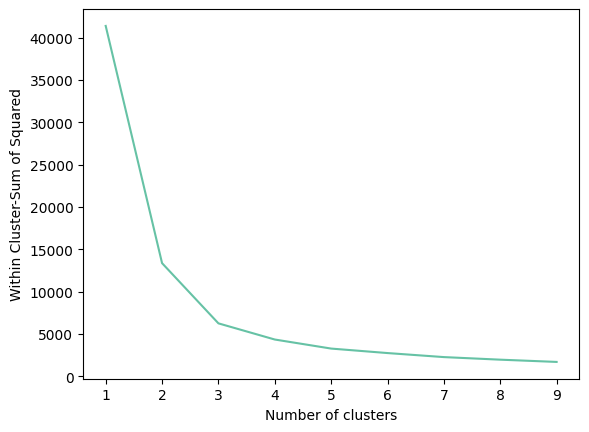

0
0
0
23


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
middle = result[result['category'] == '중기 이유식']
middle_data = pd.merge(middle, df, on='food_name', how='inner')
nutrient =  ['carbohydrate', 'protein', 'fat','calorie']
middle_train_data = middle_data.copy()
middle_train_data = middle_train_data[nutrient]

# Elbow method 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(middle_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

# KMeans 군집화 모델 생성
num_clusters = 3  # 군집 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(middle_train_data)

# 군집 결과를 데이터프레임에 추가
middle_data['cluster'] = kmeans.labels_ + 3

k0 = (middle_data['cluster'] == 0).sum();print(k0)
k1 = (middle_data['cluster'] == 1).sum();print(k1)
k2 = (middle_data['cluster'] == 2).sum();print(k2)
k3 = (middle_data['cluster'] == 3).sum();print(k3)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

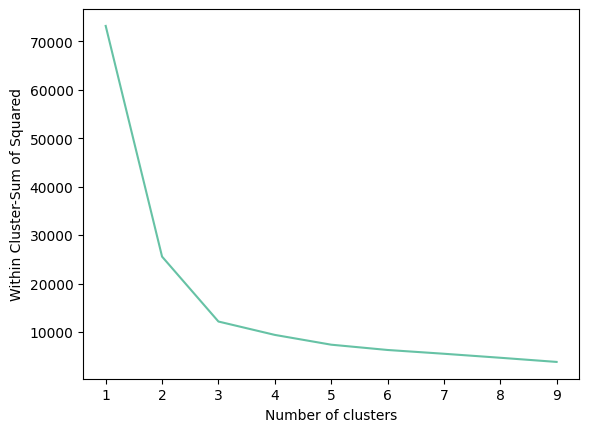

0
0
0
0


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
late = result[result['category'] == '후기 이유식']
late_data = pd.merge(late, df, on='food_name', how='inner')
nutrient =  ['carbohydrate', 'protein', 'fat','calorie']
late_train_data = late_data.copy()
late_train_data = late_train_data[nutrient]

# Elbow method 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(late_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

# KMeans 군집화 모델 생성
num_clusters = 4  # 군집 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(late_train_data)

# 군집 결과를 데이터프레임에 추가
late_data['cluster'] = kmeans.labels_ + 6

k0 = (late_data['cluster'] == 0).sum();print(k0)
k1 = (late_data['cluster'] == 1).sum();print(k1)
k2 = (late_data['cluster'] == 2).sum();print(k2)
k3 = (late_data['cluster'] == 3).sum();print(k3)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

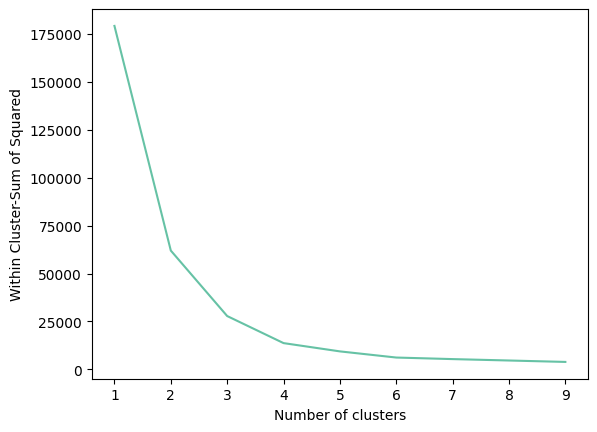

0
0
0
0
0


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
snack = result[result['category'] == '이유기 간식']
snack_data = pd.merge(snack, df, on='food_name', how='inner')
nutrient =  ['carbohydrate', 'protein', 'fat','calorie']
snack_train_data = snack_data.copy()
snack_train_data = snack_train_data[nutrient]

# Elbow method 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(snack_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

# KMeans 군집화 모델 생성
num_clusters = 3  # 군집 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(snack_train_data)

# 군집 결과를 데이터프레임에 추가
snack_data['cluster'] = kmeans.labels_ + 10

k0 = (snack_data['cluster'] == 0).sum();print(k0)
k1 = (snack_data['cluster'] == 1).sum();print(k1)
k2 = (snack_data['cluster'] == 2).sum();print(k2)
k3 = (snack_data['cluster'] == 3).sum();print(k3)
k4 = (snack_data['cluster'] == 4).sum();print(k4)

In [50]:
food_category = pd.concat([early_data, middle_data, late_data, snack_data], ignore_index=True)

In [52]:
food_category.to_csv('food_category.csv',encoding='utf-8-sig',index=False)